In [2]:
import  numpy as np 
import matplotlib.pyplot as plt
from scipy.misc import derivative 
from scipy.linalg import eigvals
from scipy.integrate import quad
import sympy as sp 

# Definicion de la función

In [25]:
λ, x = sp.symbols('λ x')

def func(λ):
  A = sp.integrate(sp.sin(λ*x)/sp.exp(x), (x, 0, np.infty))
  return A.args[0][0]

f_λ = sp.lambdify(λ, func(λ), 'numpy')

#Grafica de la función 

In [47]:
dom = np.linspace(1,100,100)
ran = f_λ(dom)

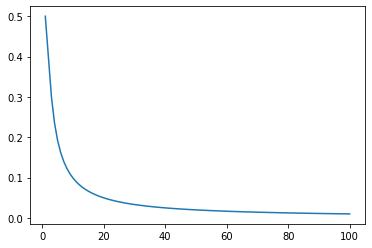

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(dom, ran)

# Obtención de la derivada

In [39]:
def derr():
  A = sp.diff(sp.integrate(sp.sin(λ*x)/sp.exp(x), (x, 0, np.infty)), λ)
  return A.args[0][0]

f_p = sp.lambdify(λ, derr(), 'numpy')

# Grafica función y derivada

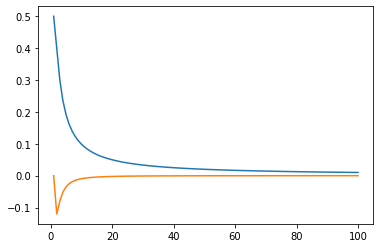

In [49]:
ran2 = f_p(dom)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.plot(dom,ran)
ax2.plot(dom, ran2)

# Obtención de la matriz Y y su transpuesta

In [125]:
Y = np.random.randint(0,101,(3,3))
Y_t = np.transpose(Y)
Y, Y_t

(array([[94, 37, 58],
        [15, 40, 92],
        [88, 84, 74]]), array([[94, 15, 88],
        [37, 40, 84],
        [58, 92, 74]]))

# Producto matricial

In [126]:
A = np.dot(Y_t,Y)


#Obtención de los eigenvalores

In [127]:
A_eig = abs(np.linalg.eig(A)[0])
Y_eig = abs(np.linalg.eig(Y)[0])

# Comparación

In [128]:
A_eig

array([39714.667919  ,  3723.43122411,   695.90085689])

In [131]:
Y_eig

array([198.39310751,  45.30053687,  35.69364439])

In [130]:
abs(((A_eig**0.5-Y_eig)/A_eig**0.5)*100)

array([ 0.44774261, 25.76107392, 35.30604721])

No se obtuvieron los resultados esperados, cada valor obtuvo un margen de error variado para cada eigenvalor.

Esto se debe a que dicho resultado solo es verdadero para matrices normales, esto es que (Y transpuesta * Y) == (Y * Y transpuesta.)

In [132]:
np.dot(Y_t,Y) == np.dot(Y, Y_t)

array([[False, False, False],
       [False, False, False],
       [False, False, False]])

Por lo tanto esto no funciona para matrices aleatorias, como es el caso de este ejercicio